In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importación fuente de datos

In [2]:
df_vis = pd.read_csv(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\10.6\Web_analytics.csv',encoding = "ISO-8859-1",delimiter=',')

In [3]:
df_vis

,Día,Visitantes web
0,16/3/20,12
1,17/3/20,14
2,18/3/20,4
3,19/3/20,9
4,20/3/20,8
...,...,...
86,10/6/20,26
87,11/6/20,36
88,12/6/20,28
89,13/6/20,27


In [4]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Día             91 non-null     object
 1   Visitantes web  91 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [5]:
df_vis["Día"] = pd.to_datetime(df_vis["Día"],dayfirst=True)

In [6]:
df_vis.index=df_vis["Día"]
df_vis.drop("Día",axis=1,inplace=True)
df_vis

,Visitantes web
Día,
2020-03-16,12
2020-03-17,14
2020-03-18,4
2020-03-19,9
2020-03-20,8
...,...
2020-06-10,26
2020-06-11,36
2020-06-12,28


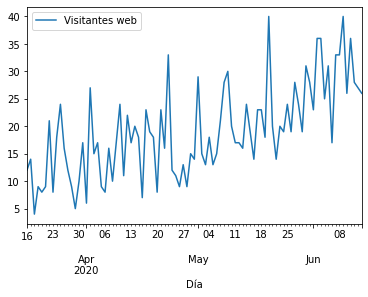

In [7]:
df_vis.plot()

# Verificar tendencia y estacionalidad

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-9-1aa7150ad922>:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_vis["Visitantes web"], model='additive', freq=freq_value)


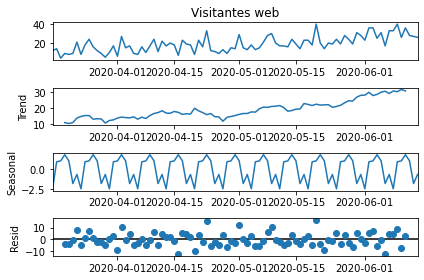

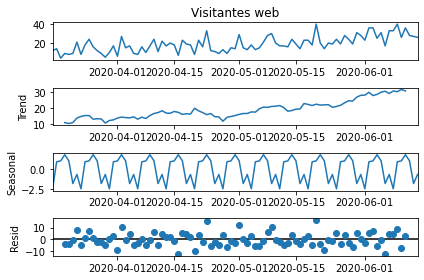

In [9]:
#freq es el número de muestras de los datos en el intervalo estacional
#Ejemplo: Si nuestros datos están guardados con resolución de 15' y queremos ver la estacionalidad semanal, entonces "freq" se calcula como:
#freq=(24h⋅60min/15min)⋅7days/sem
#freq = (24*60/15)*7

freq_value = 7 # resolución diaria - periodicidad semanal
result = seasonal_decompose(df_vis["Visitantes web"], model='additive', freq=freq_value)
result.plot()

# Predicción ARIMA

In [10]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\ivan_pinar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ivan_pinar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


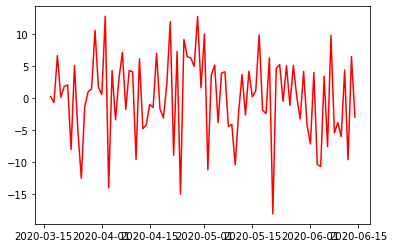

In [11]:
model = ARIMA(df_vis, order=(7, 1, 3))  
results_AR = model.fit()  
plt.plot(results_AR.fittedvalues, color='red')

In [12]:
fc, se, conf = results_AR.forecast(30, alpha=0.05)  # 95% conf

In [13]:
# Crear Series de pandas con el forecast e intervalo de confianza
fc_series = pd.Series(fc)
lower_series = pd.Series(conf[:, 0])
upper_series = pd.Series(conf[:, 1])

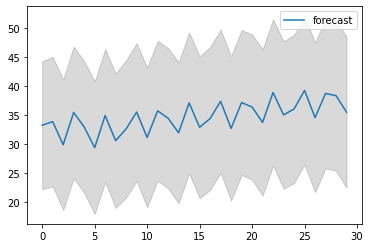

In [14]:
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.legend()

# Predicción Prophet

In [19]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [20]:
df_vis_f = pd.read_csv(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\10.6\Web_analytics.csv',encoding = "ISO-8859-1",delimiter=',')

In [21]:
df_vis_f.head()

,Día,Visitantes web
0,16/3/20,12
1,17/3/20,14
2,18/3/20,4
3,19/3/20,9
4,20/3/20,8


In [22]:
df_vis_f["Día"] = pd.to_datetime(df_vis_f["Día"],dayfirst=True)

In [23]:
df_vis_f.head()

,Día,Visitantes web
0,2020-03-16,12
1,2020-03-17,14
2,2020-03-18,4
3,2020-03-19,9
4,2020-03-20,8


In [24]:
jh = df_vis_f.rename(columns={'Día': 'ds', 'Visitantes web': 'y'})

In [25]:
jh.head()

,ds,y
0,2020-03-16,12
1,2020-03-17,14
2,2020-03-18,4
3,2020-03-19,9
4,2020-03-20,8


In [26]:
jh_model = Prophet(interval_width=0.95)
jh_model.fit(jh)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ivan_pinar\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [27]:
jh_model

In [30]:
jh_forecast = jh_model.make_future_dataframe(periods=60, freq='D') #freq = "D" (Día) / "MS" (Mes) 
jh_forecast = jh_model.predict(jh_forecast)

Text(0.5, 1, '¿Cuál es la previsión de visitantes en mi página web?')

<Figure size 1296x432 with 0 Axes>

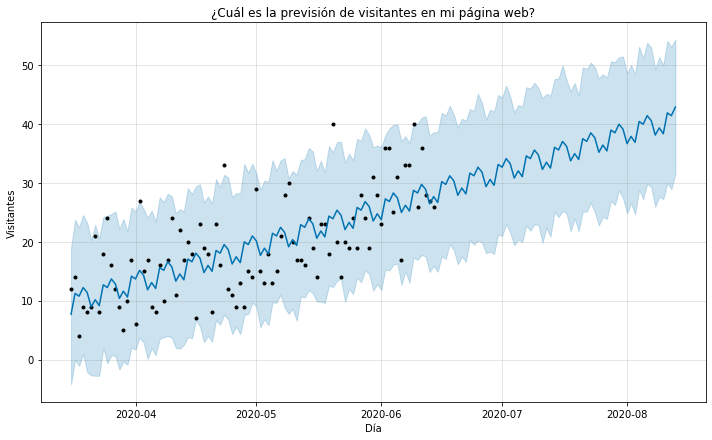

In [31]:
plt.figure(figsize=(18, 6))
jh_model.plot(jh_forecast, xlabel = 'Día', ylabel = 'Visitantes')
plt.title('¿Cuál es la previsión de visitantes en mi página web?')